In [4]:
!pip install matplotlib
!pip install scipy

    100% |████████████████████████████████| 25.9MB 48kB/s eta 0:00:011   69% |██████████████████████▎         | 18.1MB 4.4MB/s eta 0:00:02


In [7]:
import json
import matplotlib.pyplot as plt
import numpy as np, scipy.stats as st
# a = [1,2,3,3,3]
st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))

(1.2894219579208805, 3.5105780420791195)

In [1]:
timestamp=0

def read_json(filename, parameter):
    """
    Return the list of values for specified parameter.
    
    filename (string): the logs filename generated by iperf3 with --json flag
    parameter (string): the field of json file. For example "bits_per_second", "jitter_ms"
    """
    param_list = []
    with open(filename) as json_file:
        data = json.load(json_file)
        data = data['intervals']
        for stream in data:
            param_list.append(stream['streams'][0][parameter])
    
    return param_list

def plot_bandwidth(exp_data, exp_name, port_prefix='5000', offset=None, total_bandwidth=100, experiment_time_sec=60):
    """
    Build a plot of the change in throughput depends on time of experiment.
    
    exp_data (list): the list of lists produced by 'read_json' function.
    exp_name (string): the title of plot. Preferably with timestamp.
    port_prefix (string): this value is used for labels on plot. For port prefix 5000 the labels are 50000, 50001, 50002
    offset (list): the list of offsets in seconds. For example the traffic on 1 port generated from [20s-60s],
    and on 2,3 ports from [0s-60s], the offset value should be [20, 0, 0].
    total_bandwidth (int): this value is used to specify top border for y axes
    experiment_time_sec (int): his value is used to specify right border for x axes
    """
    plt.figure(figsize=(10,5))
    markers = ['o', 'x', '*', '>', '+', '.', ',', 'v', 'X', 'D', '|']
    
    plt.grid()
    plt.xlim(left=0, right=experiment_time_sec)
    plt.ylim(bottom=0, top=total_bandwidth)
    plt.title(exp_name)
    plt.xlabel('Время, сек')
    plt.ylabel('Скорость приема, Мбит/с')
    offset = [0] * len(exp_data) if offset is None else offset  # Set the offset equal 0
    
    for i, data in enumerate(exp_data):
        data = [bps/1000000 for bps in data]  # Convert bps in mbps
        plt.plot(range(offset[i], offset[i]+len(data)), data, 
        label=f'Порт: {port_prefix}{i}', marker=markers[i % len(markers)])
    
    plt.legend()
    
    

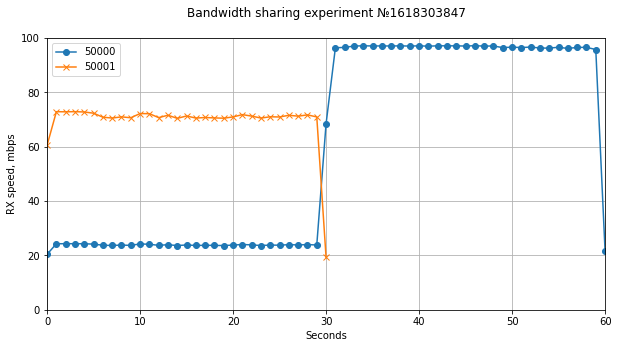

In [3]:
# Example
'''
For HFSC configurations
'''
timestamp = '1618303847'
port_prefix = '5000'
experiment_amount = 2
experiment_data = []

for i in range(experiment_amount):
    current_port = port_prefix + str(i)
    experiment_data.append(read_json(f'./logs/nresults-{timestamp}.txt.{current_port}', 'bits_per_second'))

plot_bandwidth(experiment_data, f'Bandwidth sharing experiment №{timestamp}\n')
    

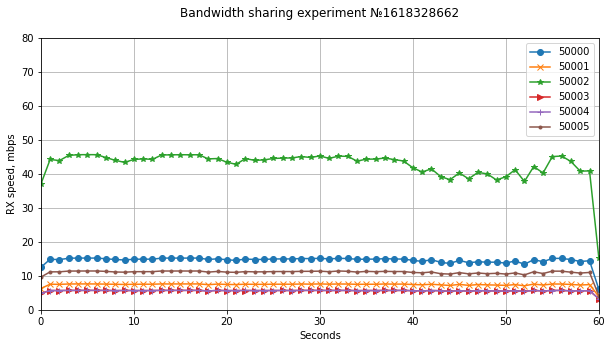

In [4]:
# Example
'''
For HFSC configurations
'''
timestamp = '1618328662'
port_prefix = '5000'
experiment_amount = 6
experiment_data = []

for i in range(experiment_amount):
    current_port = port_prefix + str(i+1)
    experiment_data.append(read_json(f'./logs/nresults-{timestamp}.txt.{current_port}', 'bits_per_second'))

plot_bandwidth(experiment_data, f'Bandwidth sharing experiment №{timestamp}\n', total_bandwidth=80)
    

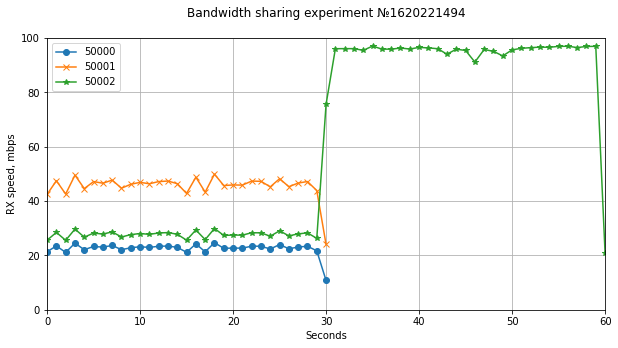

In [5]:
# Example
'''
For HFSC configurations
'''
timestamp = '1620221494'
port_prefix = '5000'
experiment_amount = 3
experiment_data = []

for i in range(experiment_amount):
    current_port = port_prefix + str(i)
    experiment_data.append(read_json(f'./logs/nresults-{timestamp}.txt.{current_port}', 'bits_per_second'))

plot_bandwidth(experiment_data, f'Bandwidth sharing experiment №{timestamp}\n', total_bandwidth=100)

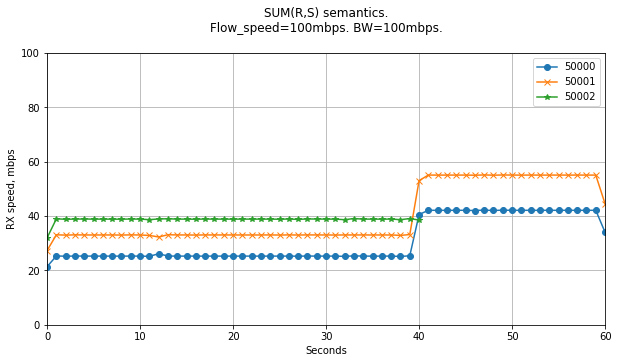

In [6]:
# Example
'''
sudo tc qdisc add dev enp0s8 root handle 1: hfsc default 999
sudo tc class add dev enp0s8 parent 1: classid 1:1 hfsc ls rate 100mbit ul rate 100mbit
sudo tc class add dev enp0s8 parent 1:1 classid 1:999 hfsc ls rate 1.5mbit ul rate 1.5mbit
sudo tc class add dev enp0s8 parent 1:1 classid 1:10 hfsc ls rate 60mbit ul rate 100mbit
sudo tc class add dev enp0s8 parent 1:1 classid 1:20 hfsc ls rate 400mbit ul rate 100mbit
sudo tc filter add dev enp0s8 prio 1 u32 match ip dport 50002 0xffff flowid 1:20
sudo tc class add dev enp0s8 parent 1:10 classid 1:11 hfsc ls rate 26mbit ul rate 100mbit
sudo tc filter add dev enp0s8 prio 1 u32 match ip dport 50000 0xffff flowid 1:11
sudo tc class add dev enp0s8 parent 1:10 classid 1:12 hfsc ls rate 34mbit ul rate 100mbit
sudo tc filter add dev enp0s8 prio 1 u32 match ip dport 50001 0xffff flowid 1:12
'''
timestamp = '1620225338'
port_prefix = '5000'
experiment_amount = 3
experiment_data = []

for i in range(experiment_amount):
    current_port = port_prefix + str(i)
    experiment_data.append(read_json(f'./logs/nresults-{timestamp}.txt.{current_port}', 'bits_per_second'))

plot_bandwidth(experiment_data, f'SUM(R,S) semantics.\nFlow_speed=100mbps. BW=100mbps.\n', total_bandwidth=100)

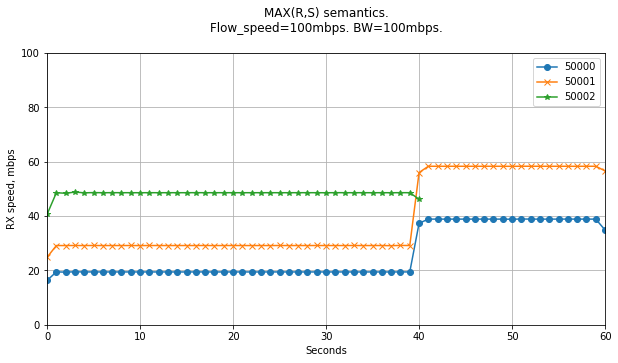

In [7]:
# Example
'''
sudo tc qdisc add dev enp0s8 root handle 1: hfsc default 999
sudo tc class add dev enp0s8 parent 1: classid 1:1 hfsc ls rate 100mbit ul rate 100mbit
sudo tc class add dev enp0s8 parent 1:1 classid 1:999 hfsc ls rate 1.5mbit ul rate 1.5mbit
sudo tc class add dev enp0s8 parent 1:1 classid 1:10 hfsc ls rate 50mbit ul rate 100mbit
sudo tc class add dev enp0s8 parent 1:1 classid 1:20 hfsc ls rate 50mbit ul rate 100mbit
sudo tc filter add dev enp0s8 prio 1 u32 match ip dport 50002 0xffff flowid 1:20
sudo tc class add dev enp0s8 parent 1:10 classid 1:11 hfsc ls rate 20mbit ul rate 100mbit
sudo tc filter add dev enp0s8 prio 1 u32 match ip dport 50000 0xffff flowid 1:11
sudo tc class add dev enp0s8 parent 1:10 classid 1:12 hfsc ls rate 30mbit ul rate 100mbit
sudo tc filter add dev enp0s8 prio 1 u32 match ip dport 50001 0xffff flowid 1:12
'''
timestamp = '1620224914'
port_prefix = '5000'
experiment_amount = 3
experiment_data = []

for i in range(experiment_amount):
    current_port = port_prefix + str(i)
    experiment_data.append(read_json(f'./logs/nresults-{timestamp}.txt.{current_port}', 'bits_per_second'))
# for i, el in enumerate(experiment_data[2]):
#     print(i, el)
plot_bandwidth(experiment_data, f'MAX(R,S) semantics.\nFlow_speed=100mbps. BW=100mbps.\n', total_bandwidth=100)

67.85774363356174 +- 0.08513837861853837
29.082056881741547 +- 0.03690000185417384
39.07663970286276 +- 0.1099927421406135
67.8769247631713 +- 0.13404507087004186
29.124128825529105 +- 0.046268070713952184
38.498525266488805 +- 0.1408119149010256


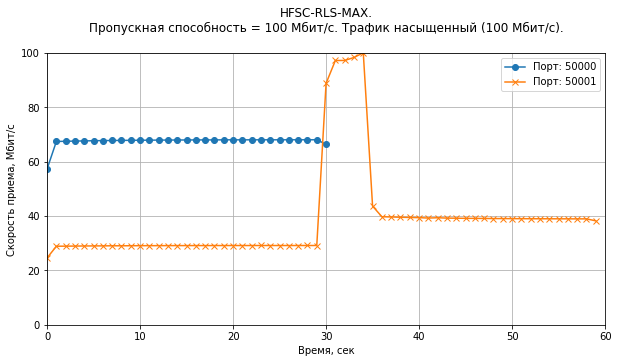

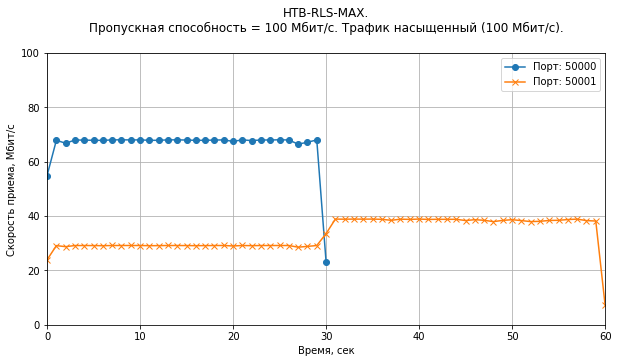

In [29]:
# Example
'''
max2hfsc
'''
timestamp = '1621244763'
port_prefix = '5000'
experiment_amount = 2
experiment_data = []

for i in range(experiment_amount):
    current_port = port_prefix + str(i)
    experiment_data.append(read_json(f'./logs/max2_hfsc/nresults-{timestamp}.txt.{current_port}', 'bits_per_second'))

plot_bandwidth(experiment_data, f'HFSC-RLS-MAX.\nПропускная способность = 100 Мбит/с. Трафик насыщенный (100 Мбит/с).\n', total_bandwidth=100)


v = experiment_data[0][1:21] 
interval = st.t.interval(0.95, 20, loc=np.mean(v), scale=st.sem(v))
print(f'{np.mean(v)/1000000} +- {(np.mean(v) - interval[0])/1000000}')

v = experiment_data[1][1:21] 
interval = st.t.interval(0.95, 20, loc=np.mean(v), scale=st.sem(v))
print(f'{np.mean(v)/1000000} +- {(np.mean(v) - interval[0])/1000000}')

v = experiment_data[1][-20:] 
interval = st.t.interval(0.95, 20, loc=np.mean(v), scale=st.sem(v))
print(f'{np.mean(v)/1000000} +- {(np.mean(v) - interval[0])/1000000}')

# print(interval, np.mean(v))

# Example
'''
max2htb
'''
timestamp = '1621244519'
port_prefix = '5000'
experiment_amount = 2
experiment_data = []

for i in range(experiment_amount):
    current_port = port_prefix + str(i)
    experiment_data.append(read_json(f'./logs/max2_htb/nresults-{timestamp}.txt.{current_port}', 'bits_per_second'))
# for i, el in enumerate(experiment_data[2]):
#     print(i, el)
plot_bandwidth(experiment_data, f'HTB-RLS-MAX.\nПропускная способность = 100 Мбит/с. Трафик насыщенный (100 Мбит/с).\n', total_bandwidth=100)


v = experiment_data[0][1:21] 
interval = st.t.interval(0.95, 20, loc=np.mean(v), scale=st.sem(v))
print(f'{np.mean(v)/1000000} +- {(np.mean(v) - interval[0])/1000000}')

v = experiment_data[1][1:21] 
interval = st.t.interval(0.95, 20, loc=np.mean(v), scale=st.sem(v))
print(f'{np.mean(v)/1000000} +- {(np.mean(v) - interval[0])/1000000}')

v = experiment_data[1][-21:-1] 
interval = st.t.interval(0.95, 20, loc=np.mean(v), scale=st.sem(v))
print(f'{np.mean(v)/1000000} +- {(np.mean(v) - interval[0])/1000000}')

61.907226314320305 +- 0.21557166241235287
34.83611915891831 +- 0.1260337413771078
39.08727627188805 +- 0.09836464242321998
61.824996544658006 +- 0.3186811851492226
34.80643611945245 +- 0.16778936097390204
38.413641206295296 +- 0.6418536155035645


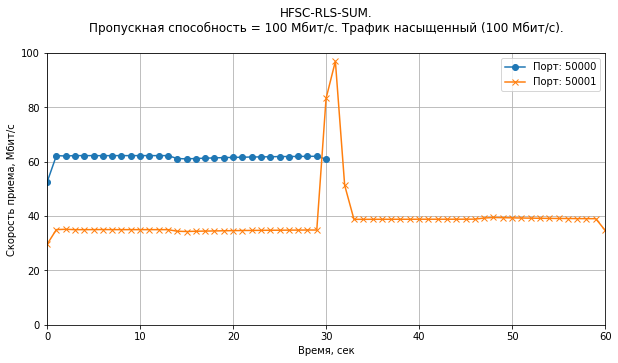

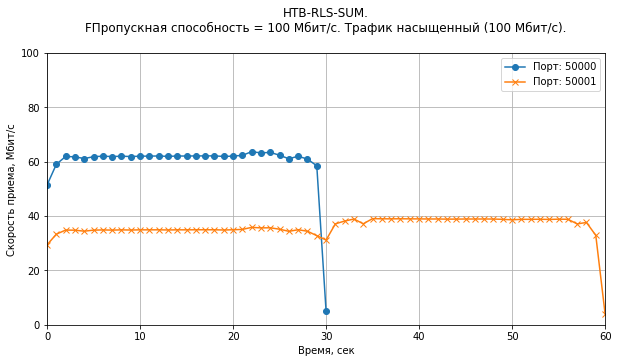

In [30]:
# Example
'''
sum2hfsc
'''
timestamp = '1621245113'
port_prefix = '5000'
experiment_amount = 2
experiment_data = []

for i in range(experiment_amount):
    current_port = port_prefix + str(i)
    experiment_data.append(read_json(f'./logs/sum2_hfsc/nresults-{timestamp}.txt.{current_port}', 'bits_per_second'))
# for i, el in enumerate(experiment_data[2]):
#     print(i, el)
plot_bandwidth(experiment_data, f'HFSC-RLS-SUM.\nПропускная способность = 100 Мбит/с. Трафик насыщенный (100 Мбит/с).\n', total_bandwidth=100)

v = experiment_data[0][1:21] 
interval = st.t.interval(0.95, 20, loc=np.mean(v), scale=st.sem(v))
print(f'{np.mean(v)/1000000} +- {(np.mean(v) - interval[0])/1000000}')

v = experiment_data[1][1:21] 
interval = st.t.interval(0.95, 20, loc=np.mean(v), scale=st.sem(v))
print(f'{np.mean(v)/1000000} +- {(np.mean(v) - interval[0])/1000000}')

v = experiment_data[1][-21:-1] 
interval = st.t.interval(0.95, 20, loc=np.mean(v), scale=st.sem(v))
print(f'{np.mean(v)/1000000} +- {(np.mean(v) - interval[0])/1000000}')

# Example
'''
sum2htb
'''
timestamp = '1621244938'
port_prefix = '5000'
experiment_amount = 2
experiment_data = []

for i in range(experiment_amount):
    current_port = port_prefix + str(i)
    experiment_data.append(read_json(f'./logs/sum2_htb/nresults-{timestamp}.txt.{current_port}', 'bits_per_second'))
# for i, el in enumerate(experiment_data[2]):
#     print(i, el)
plot_bandwidth(experiment_data, f'HTB-RLS-SUM.\nFПропускная способность = 100 Мбит/с. Трафик насыщенный (100 Мбит/с).\n', total_bandwidth=100)

v = experiment_data[0][1:21] 
interval = st.t.interval(0.95, 20, loc=np.mean(v), scale=st.sem(v))
print(f'{np.mean(v)/1000000} +- {(np.mean(v) - interval[0])/1000000}')

v = experiment_data[1][1:21] 
interval = st.t.interval(0.95, 20, loc=np.mean(v), scale=st.sem(v))
print(f'{np.mean(v)/1000000} +- {(np.mean(v) - interval[0])/1000000}')

v = experiment_data[1][-21:-1] 
interval = st.t.interval(0.95, 20, loc=np.mean(v), scale=st.sem(v))
print(f'{np.mean(v)/1000000} +- {(np.mean(v) - interval[0])/1000000}')

25.230034281325803 +- 0.05736600556593388
32.9843628064296 +- 0.07752108201250434
38.79365430941844 +- 0.09094284651075303
51.656981340057 +- 0.4004027988756746
43.94023495324559 +- 0.35861791499506684


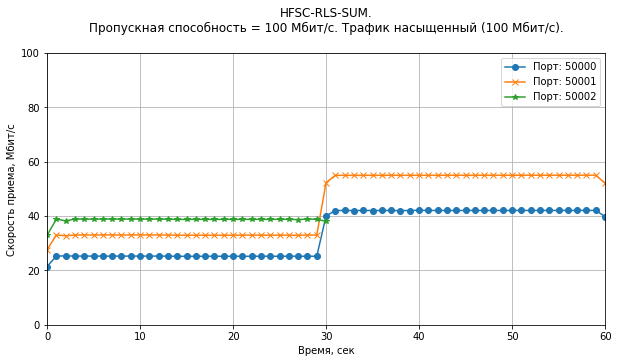

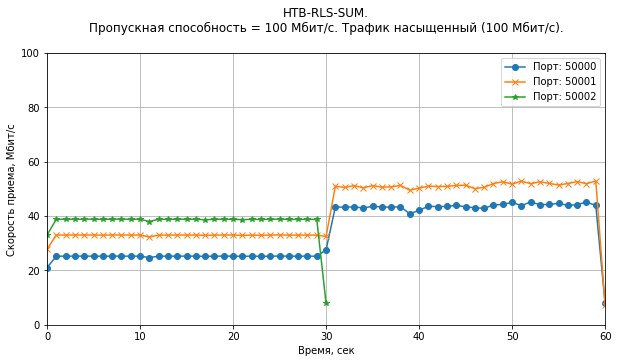

In [31]:
# Example
'''
sum2hfsc
'''
timestamp = '1621246075'
port_prefix = '5000'
experiment_amount = 3
experiment_data = []

for i in range(experiment_amount):
    current_port = port_prefix + str(i)
    experiment_data.append(read_json(f'./logs/small_hfsc_sum/nresults-{timestamp}.txt.{current_port}', 'bits_per_second'))
# for i, el in enumerate(experiment_data[2]):
#     print(i, el)
plot_bandwidth(experiment_data, f'HFSC-RLS-SUM.\nПропускная способность = 100 Мбит/с. Трафик насыщенный (100 Мбит/с).\n', total_bandwidth=100)

# Example
'''
sum2htb
'''
timestamp = '1621268842'
port_prefix = '5000'
experiment_amount = 3
experiment_data = []

for i in range(experiment_amount):
    current_port = port_prefix + str(i)
    experiment_data.append(read_json(f'./logs/small_htb_sum/nresults-{timestamp}.txt.{current_port}', 'bits_per_second'))
# for i, el in enumerate(experiment_data[2]):
#     print(i, el)
plot_bandwidth(experiment_data, f'HTB-RLS-SUM.\nПропускная способность = 100 Мбит/с. Трафик насыщенный (100 Мбит/с).\n', total_bandwidth=100)

v = experiment_data[0][1:21] 
interval = st.t.interval(0.95, 20, loc=np.mean(v), scale=st.sem(v))
print(f'{np.mean(v)/1000000} +- {(np.mean(v) - interval[0])/1000000}')

v = experiment_data[1][1:21] 
interval = st.t.interval(0.95, 20, loc=np.mean(v), scale=st.sem(v))
print(f'{np.mean(v)/1000000} +- {(np.mean(v) - interval[0])/1000000}')

v = experiment_data[2][1:21] 
interval = st.t.interval(0.95, 20, loc=np.mean(v), scale=st.sem(v))
print(f'{np.mean(v)/1000000} +- {(np.mean(v) - interval[0])/1000000}')

v = experiment_data[1][-21:-1] 
interval = st.t.interval(0.95, 20, loc=np.mean(v), scale=st.sem(v))
print(f'{np.mean(v)/1000000} +- {(np.mean(v) - interval[0])/1000000}')
v = experiment_data[0][-21:-1] 
interval = st.t.interval(0.95, 20, loc=np.mean(v), scale=st.sem(v))
print(f'{np.mean(v)/1000000} +- {(np.mean(v) - interval[0])/1000000}')

19.2539291685754 +- 0.07894594895717874
28.83788158071665 +- 0.13219806671262904
47.98196903829925 +- 0.24463268849404157
53.20956788365265 +- 0.2844133378552943
43.58788816799401 +- 0.22705562763314693


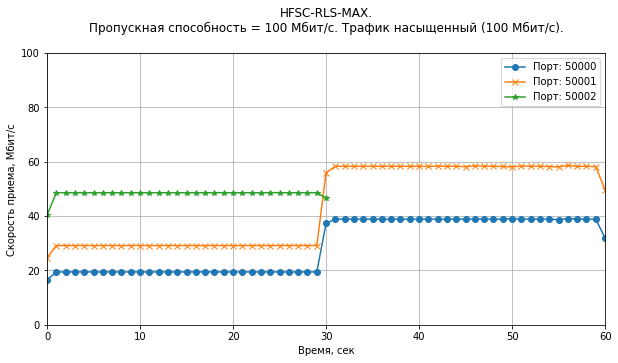

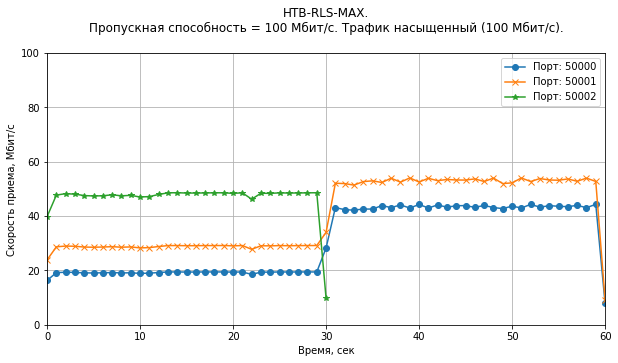

In [32]:
# Example
'''
max2hfsc
'''
timestamp = '1621269359'
port_prefix = '5000'
experiment_amount = 3
experiment_data = []

for i in range(experiment_amount):
    current_port = port_prefix + str(i)
    experiment_data.append(read_json(f'./logs/small_hfsc_max/nresults-{timestamp}.txt.{current_port}', 'bits_per_second'))
# for i, el in enumerate(experiment_data[2]):
#     print(i, el)
plot_bandwidth(experiment_data, f'HFSC-RLS-MAX.\nПропускная способность = 100 Мбит/с. Трафик насыщенный (100 Мбит/с).\n', total_bandwidth=100)

# Example
'''
max2htb
'''
timestamp = '1621269571'
port_prefix = '5000'
experiment_amount = 3
experiment_data = []

for i in range(experiment_amount):
    current_port = port_prefix + str(i)
    experiment_data.append(read_json(f'./logs/small_htb_max/nresults-{timestamp}.txt.{current_port}', 'bits_per_second'))
# for i, el in enumerate(experiment_data[2]):
#     print(i, el)
plot_bandwidth(experiment_data, f'HTB-RLS-MAX.\nПропускная способность = 100 Мбит/с. Трафик насыщенный (100 Мбит/с).\n', total_bandwidth=100)

v = experiment_data[0][1:21] 
interval = st.t.interval(0.95, 20, loc=np.mean(v), scale=st.sem(v))
print(f'{np.mean(v)/1000000} +- {(np.mean(v) - interval[0])/1000000}')

v = experiment_data[1][1:21] 
interval = st.t.interval(0.95, 20, loc=np.mean(v), scale=st.sem(v))
print(f'{np.mean(v)/1000000} +- {(np.mean(v) - interval[0])/1000000}')

v = experiment_data[2][1:21] 
interval = st.t.interval(0.95, 20, loc=np.mean(v), scale=st.sem(v))
print(f'{np.mean(v)/1000000} +- {(np.mean(v) - interval[0])/1000000}')

v = experiment_data[1][-21:-1] 
interval = st.t.interval(0.95, 20, loc=np.mean(v), scale=st.sem(v))
print(f'{np.mean(v)/1000000} +- {(np.mean(v) - interval[0])/1000000}')
v = experiment_data[0][-21:-1] 
interval = st.t.interval(0.95, 20, loc=np.mean(v), scale=st.sem(v))
print(f'{np.mean(v)/1000000} +- {(np.mean(v) - interval[0])/1000000}')

25.68842191241815 +- 0.12424637307311222
12.92822270499365 +- 0.07729984327462688
19.020317361531802 +- 0.03505592891383544
3.39776287657585 +- 0.10636474932700768
20.809612716857146 +- 0.061272967605244366
9.5145424437771 +- 0.04066124758272059


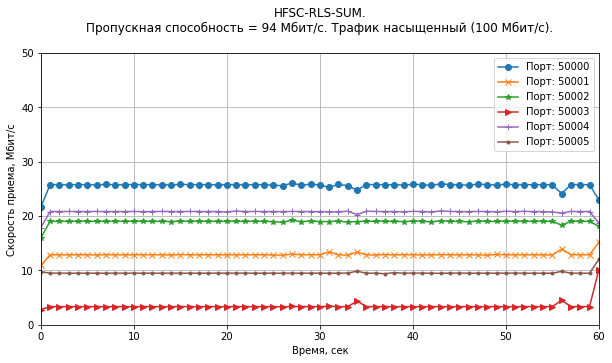

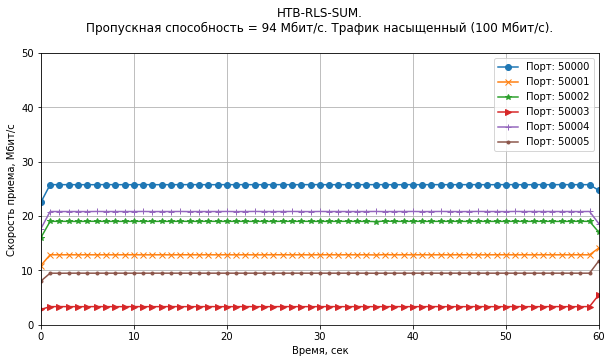

In [36]:
# Example
'''
sum2hfsc
'''
timestamp = '1621273364'
port_prefix = '5000'
experiment_amount = 6
experiment_data = []

for i in range(experiment_amount):
    current_port = port_prefix + str(i+1)
    experiment_data.append(read_json(f'./logs/sum_hfsc_hclock/nresults-{timestamp}.txt.{current_port}', 'bits_per_second'))
for exp in experiment_data:
    v = exp[20:40] 
    interval = st.t.interval(0.95, 20, loc=np.mean(v), scale=st.sem(v))
    print(f'{np.mean(v)/1000000} +- {(np.mean(v) - interval[0])/1000000}')
plot_bandwidth(experiment_data, f'HFSC-RLS-SUM.\nПропускная способность = 94 Мбит/с. Трафик насыщенный (100 Мбит/с).\n', total_bandwidth=50)

# Example
'''
sum2htb
'''
timestamp = '1621274494'
port_prefix = '5000'
experiment_amount = 6
experiment_data = []

for i in range(experiment_amount):
    current_port = port_prefix + str(i+1)
    experiment_data.append(read_json(f'./logs/sum_htb_hclock/nresults-{timestamp}.txt.{current_port}', 'bits_per_second'))

plot_bandwidth(experiment_data, f'HTB-RLS-SUM.\nПропускная способность = 94 Мбит/с. Трафик насыщенный (100 Мбит/с).\n', total_bandwidth=50)

19.440808407099343 +- 0.011756542399771511
9.7207061302243 +- 0.0023407316454481333
28.5091613186843 +- 0.018287845500912517
1.9441432657044002 +- 0.0026568118749891872
17.496716461978398 +- 0.012025167533379047
14.259511912375297 +- 0.008749701540917159


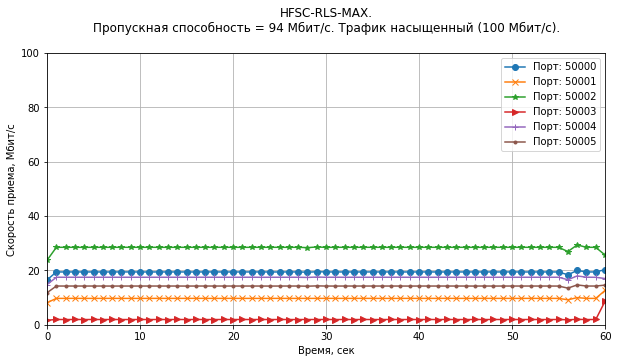

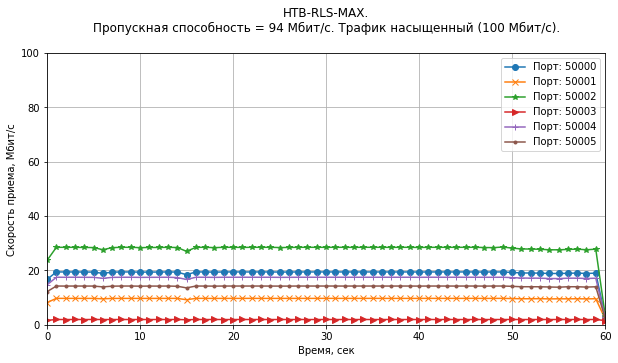

In [37]:
# Example
'''
max2hfsc
'''
timestamp = '1621275428'
port_prefix = '5000'
experiment_amount = 6
experiment_data = []

for i in range(experiment_amount):
    current_port = port_prefix + str(i+1)
    experiment_data.append(read_json(f'./logs/max_hfsc_hclock/nresults-{timestamp}.txt.{current_port}', 'bits_per_second'))
for exp in experiment_data:
    v = exp[20:40] 
    interval = st.t.interval(0.95, 20, loc=np.mean(v), scale=st.sem(v))
    print(f'{np.mean(v)/1000000} +- {(np.mean(v) - interval[0])/1000000}')
plot_bandwidth(experiment_data, f'HFSC-RLS-MAX.\nПропускная способность = 94 Мбит/с. Трафик насыщенный (100 Мбит/с).\n', total_bandwidth=100)

# Example
'''
max2htb
'''
timestamp = '1621275715'
port_prefix = '5000'
experiment_amount = 6
experiment_data = []

for i in range(experiment_amount):
    current_port = port_prefix + str(i+1)
    experiment_data.append(read_json(f'./logs/max_htb_hclock/nresults-{timestamp}.txt.{current_port}', 'bits_per_second'))
# for i, el in enumerate(experiment_data[2]):
#     print(i, el)
plot_bandwidth(experiment_data, f'HTB-RLS-MAX.\nПропускная способность = 94 Мбит/с. Трафик насыщенный (100 Мбит/с).\n', total_bandwidth=100)

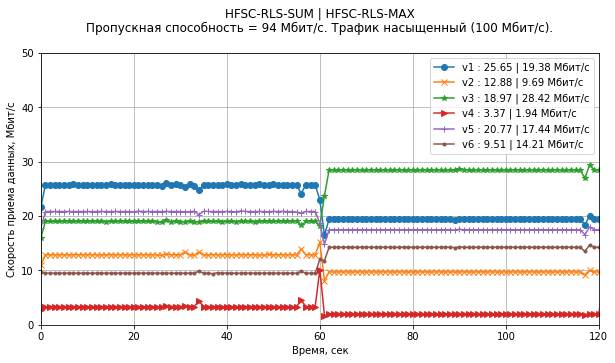

In [94]:
# SUM + MAX
'''
max2hfsc
'''
timestamp = '1621275428'
port_prefix = '5000'
experiment_amount = 6
experiment_data_sum = []
experiment_data_max = []
experiment_data = []
avgs_str = []

for i in range(experiment_amount):
    current_port = port_prefix + str(i+1)
    experiment_data_sum.append(read_json(f'./logs/sum_hfsc_hclock/nresults-1621273364.txt.{current_port}', 'bits_per_second'))
    experiment_data_max.append(read_json(f'./logs/max_hfsc_hclock/nresults-{timestamp}.txt.{current_port}', 'bits_per_second'))
    avg_sum = sum(experiment_data_sum[i][:-2])/(len(experiment_data_sum[i])-2)
    avg_max = sum(experiment_data_max[i][:-2])/(len(experiment_data_max[i])-2)
    avgs_str.append(f'{round(avg_sum/1000000,2)} | {round(avg_max/1000000,2)}')
    experiment_data.append(experiment_data_sum[i] + experiment_data_max[i])
    
# print(avgs_str)
# plot_bandwidth(experiment_data, f'HFSC-RLS-SUM | HFSC-RLS-MAX\nFlow_speed=100mbps. BW=100mbps.\n', total_bandwidth=50,experiment_time_sec=120)
plt.figure(figsize=(10,5))
markers = ['o', 'x', '*', '>', '+', '.', ',', 'v', 'X', 'D', '|']

plt.grid()
plt.xlim(left=0, right=120)
plt.ylim(bottom=0, top=50)
plt.title('HFSC-RLS-SUM | HFSC-RLS-MAX\nПропускная способность = 94 Мбит/с. Трафик насыщенный (100 Мбит/с).\n')
plt.xlabel('Время, сек')
plt.ylabel('Скорость приема данных, Мбит/с')

for i, data in enumerate(experiment_data):
    data = [bps/1000000 for bps in data]  # Convert bps in mbps
    plt.plot(range(0, len(data)), data, 
    label=f'v{i+1} : {avgs_str[i]} Мбит/с', marker=markers[i % len(markers)])

plt.legend()
plt.savefig('sum_max_hfsc_hclock.png')